# __1. Import Packages__

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import skew
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('./winequality-red.csv', sep=';')

# __2. Dataset Overview__

In [4]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
raw_data.shape

(1599, 12)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# __3. Exploratory Data Analysis__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
features = data.drop(columns=['quality']).columns
target = data['quality']

## __3.1 Missing values__

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

__There is no missing values present in this dataset.__

##  __3.2 Duplicated Values__

In [11]:
data.duplicated().sum()

240

__There are 240 duplicated values present in this dataset.__

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(1359, 12)

## __3.3 Finding outliers in the dataset__

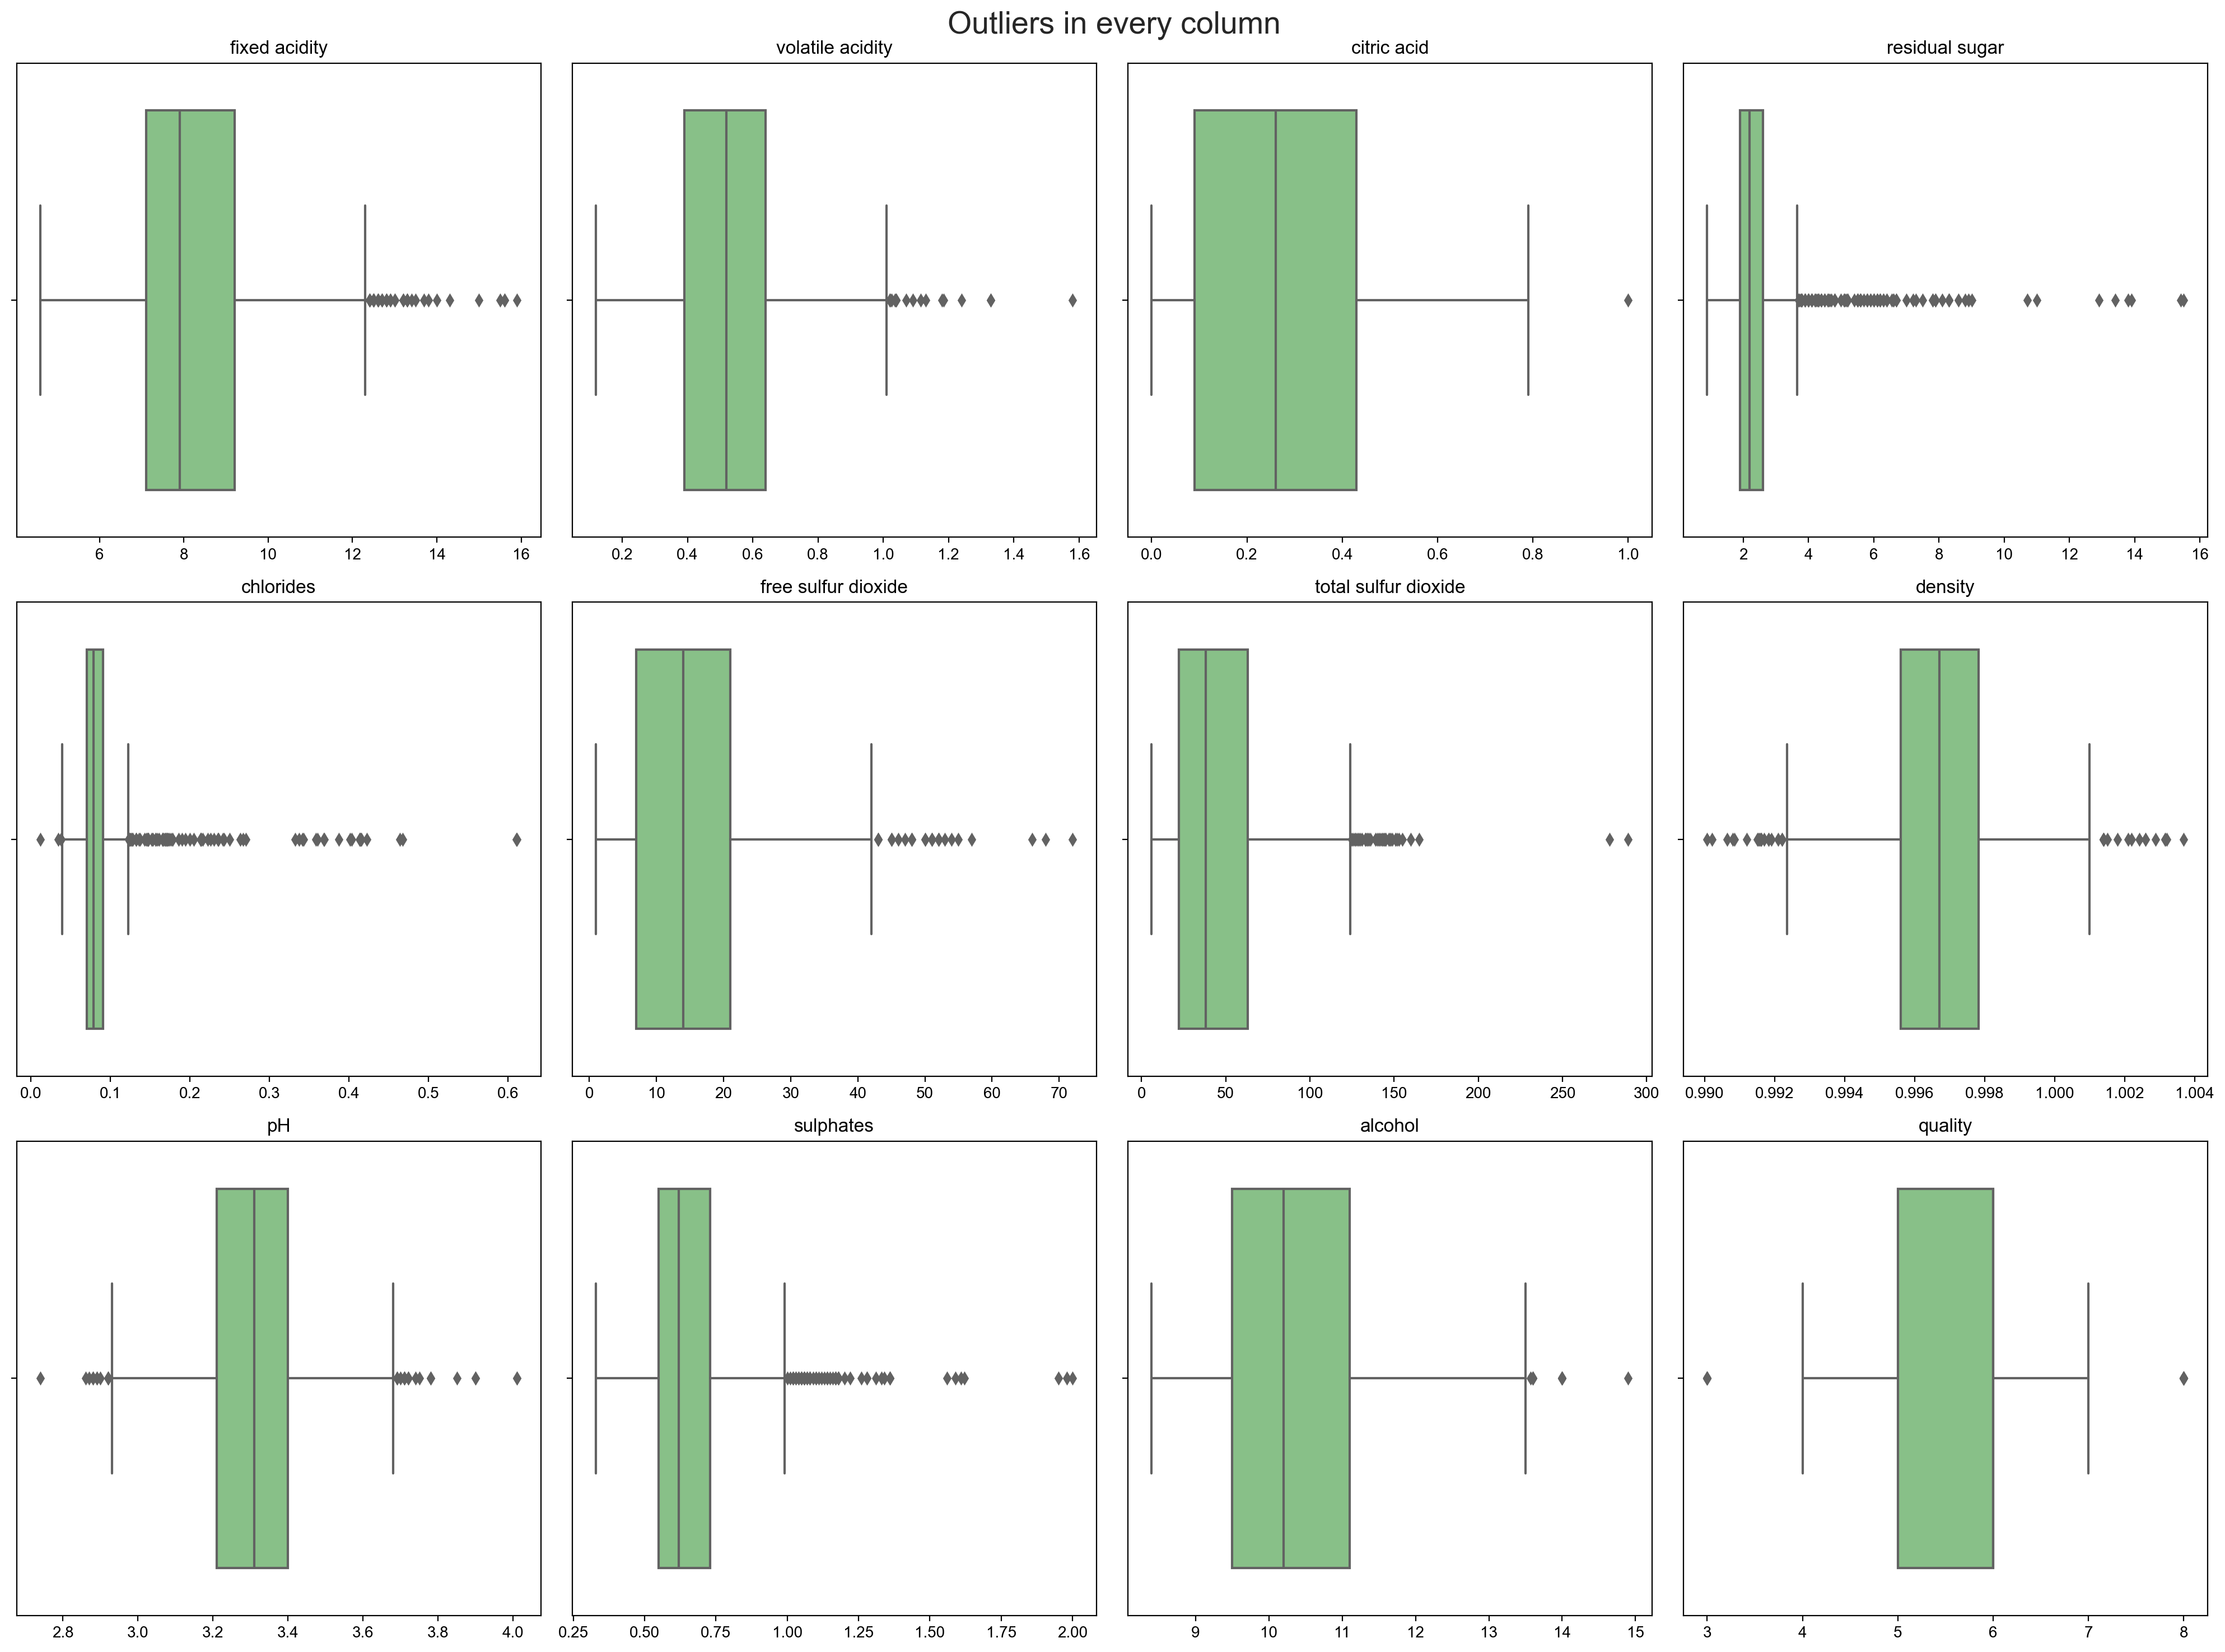

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15), dpi=200)
axes = axes.flat
sns.set_style("whitegrid")
for index, column in enumerate(data):
    graph = sns.boxplot(
        data=data, 
        x=column, 
        palette='Accent',
        ax=axes[index]
)
    axes[index].set_title(column, size=12)
    axes[index].set_xlabel('')
plt.suptitle('Outliers in every column', fontsize=20)
plt.tight_layout()

__There are so many outliers in this dataset.__

## __3.4 Distribution of continuos variables__

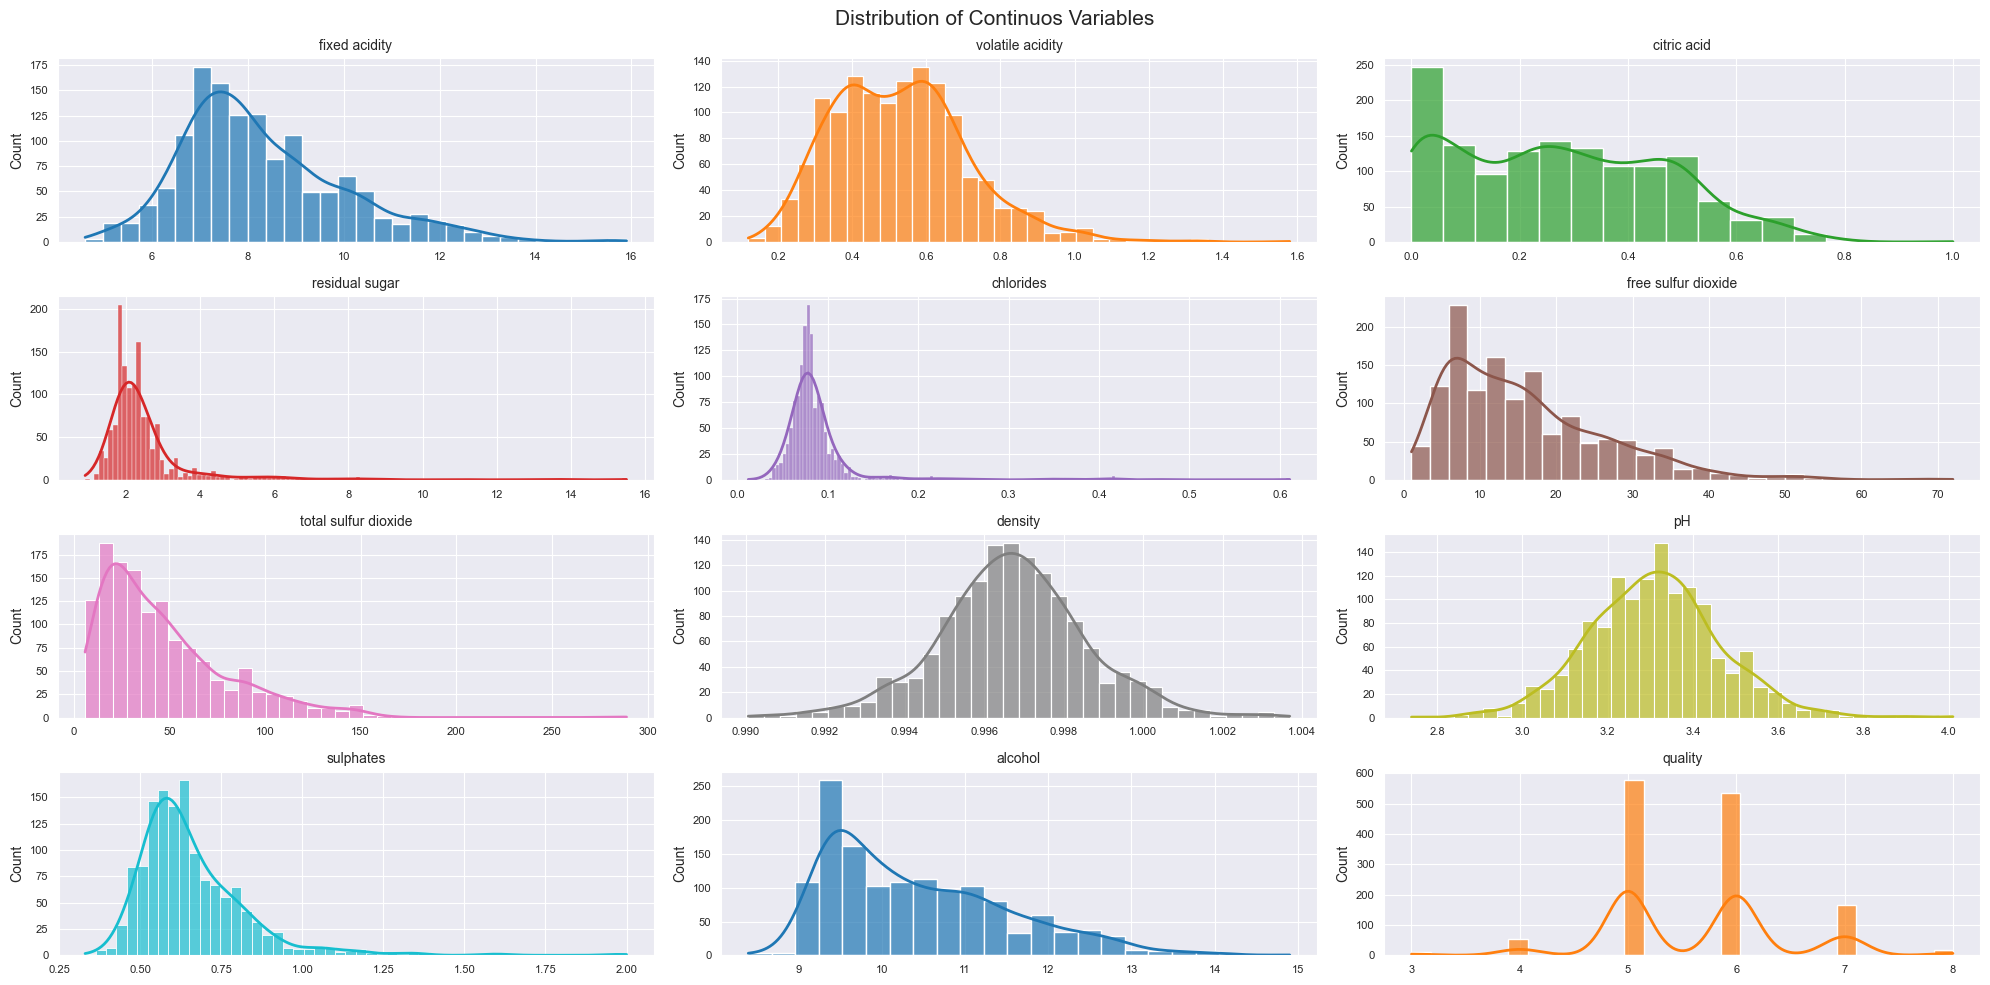

In [15]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes = axes.flat
for index, column in enumerate(data):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.7,
        ax      = axes[index]
)

    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')
plt.suptitle('Distribution of Continuos Variables', fontsize=15)
plt.tight_layout()

__Density and pH are the only column normally distributed in the dataset.__
__Other variables are highly skewed.__

## __3.5 Skewness of Continuous Variables__

In [16]:
skew = {}
for col in features:
    skewness = data[col].skew()
    skew[col]=skewness
    print(f"Skewness of {col}: {skewness}")

Skewness of fixed acidity: 0.9410413664561449
Skewness of volatile acidity: 0.7292789463991854
Skewness of citric acid: 0.31272554238899036
Skewness of residual sugar: 4.548153403940447
Skewness of chlorides: 5.502487294623722
Skewness of free sulfur dioxide: 1.2265794991760643
Skewness of total sulfur dioxide: 1.5403680777213933
Skewness of density: 0.04477785573116107
Skewness of pH: 0.2320322752014824
Skewness of sulphates: 2.4065046145674196
Skewness of alcohol: 0.8598411692032926


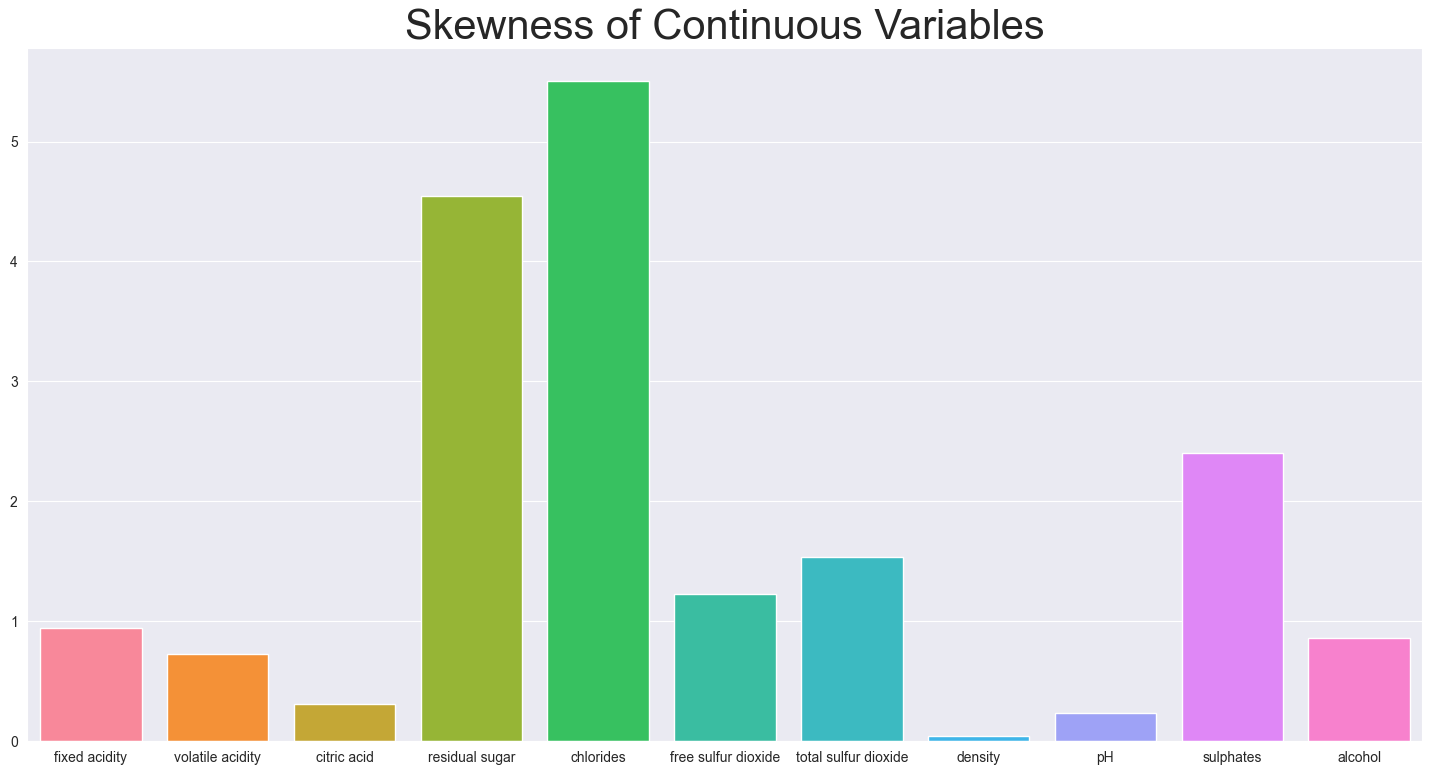

In [17]:
plt.figure(figsize=(18,9))
sns.barplot(x=list(skew.keys()), y=list(skew.values()), saturation=2)
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

__Sulphates, Residual sugar and Chlorides are the highly skewed variables.__

In [18]:
skew = {}
for col in features:
    skewness = np.log(data[col]).skew()
    skew[col]=skewness
    print(f"Skewness of {col}: {skewness}")

Skewness of fixed acidity: 0.3488037361098303
Skewness of volatile acidity: -0.3307953869456426
Skewness of citric acid: nan
Skewness of residual sugar: 1.7652376788280852
Skewness of chlorides: 1.8876423282330907
Skewness of free sulfur dioxide: -0.22006917758574188
Skewness of total sulfur dioxide: -0.07816071342785713
Skewness of density: 0.03683872065905041
Skewness of pH: 0.03976372242209134
Skewness of sulphates: 0.9614602293854239
Skewness of alcohol: 0.6633592527469497


__using np.log we can handle skewness in the dataset.__

In [19]:
for col in data[features]:
    data[col] = np.log(data[col])

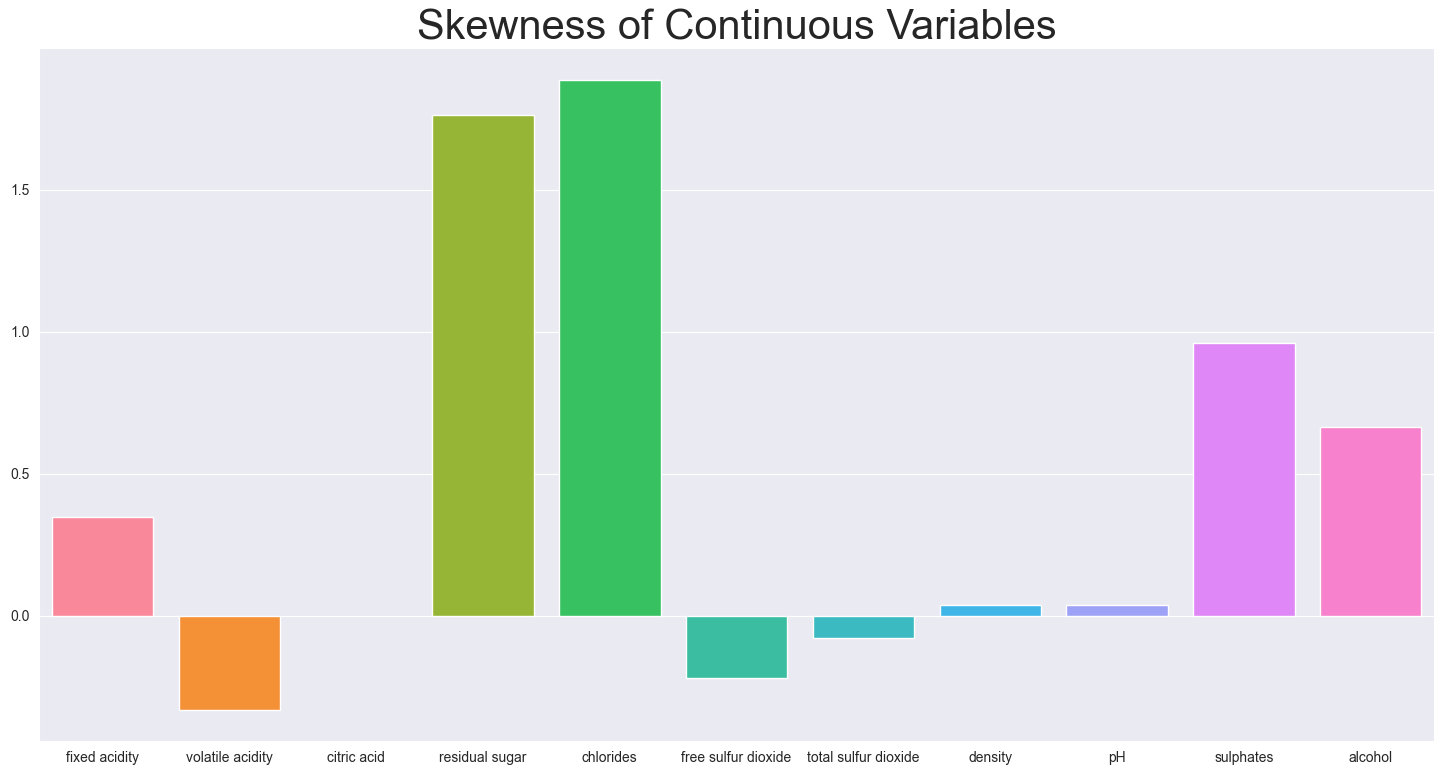

In [20]:
plt.figure(figsize=(18,9))
sns.barplot(x=list(skew.keys()), y=list(skew.values()), saturation=2)
plt.title("Skewness of Continuous Variables", fontsize=30)
plt.show()

__Now we handled the skewness in the dataset.__

### __Distribution of the data after handled the skewness__

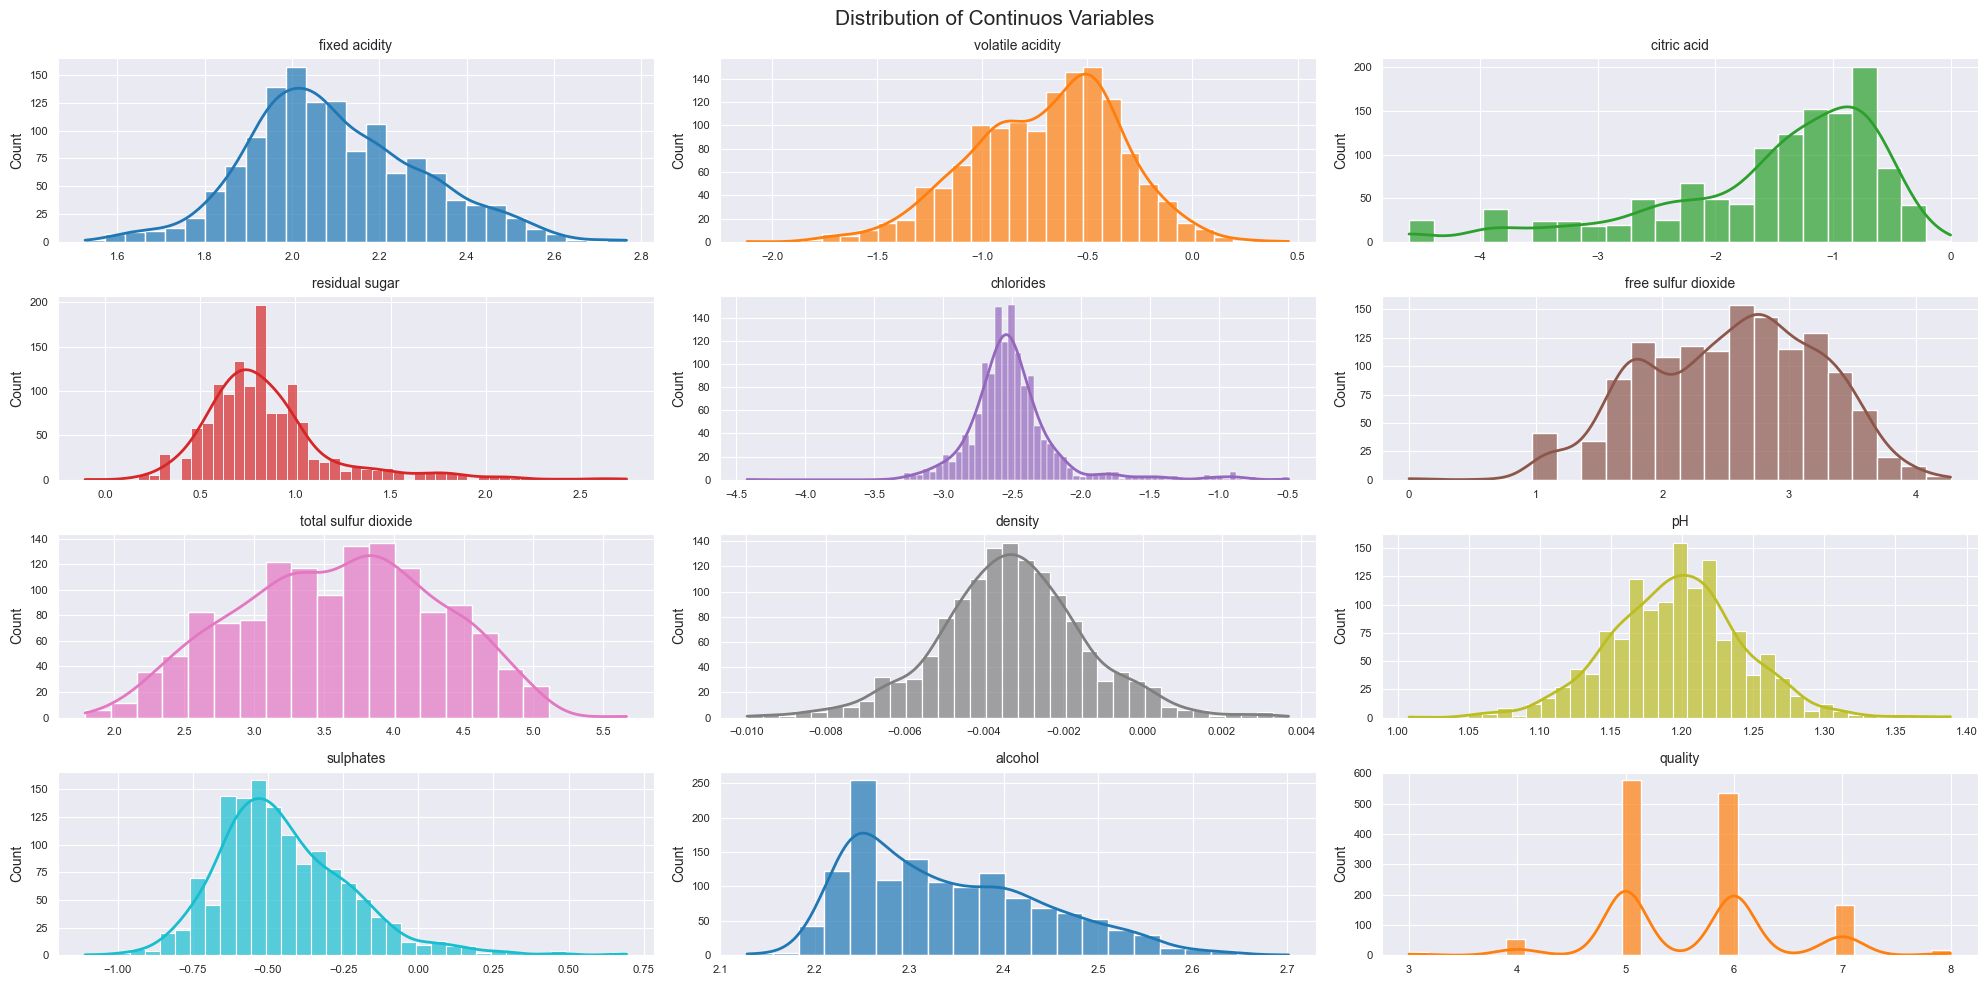

In [21]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes = axes.flat
for index, column in enumerate(data):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.7,
        ax      = axes[index]
)

    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')
plt.suptitle('Distribution of Continuos Variables', fontsize=15)
plt.tight_layout()

## __3.6 Kurtosis of continuos variables__

In [22]:
kurt = {}
for col in data.columns:
    kurtosis = data[col].kurt()
    kurt[col]=kurtosis
    print(f"Kurtosis of {col}: {kurtosis}")

Kurtosis of fixed acidity: 0.0791568203998767
Kurtosis of volatile acidity: 0.047137346643409295
Kurtosis of citric acid: nan
Kurtosis of residual sugar: 4.869054720647114
Kurtosis of chlorides: 8.656165894923285
Kurtosis of free sulfur dioxide: -0.5246857107550431
Kurtosis of total sulfur dioxide: -0.6914357406563889
Kurtosis of density: 0.8291703764894107
Kurtosis of pH: 0.708783526267486
Kurtosis of sulphates: 2.1139717385780146
Kurtosis of alcohol: -0.3171752270642778
Kurtosis of quality: 0.3402560880620915


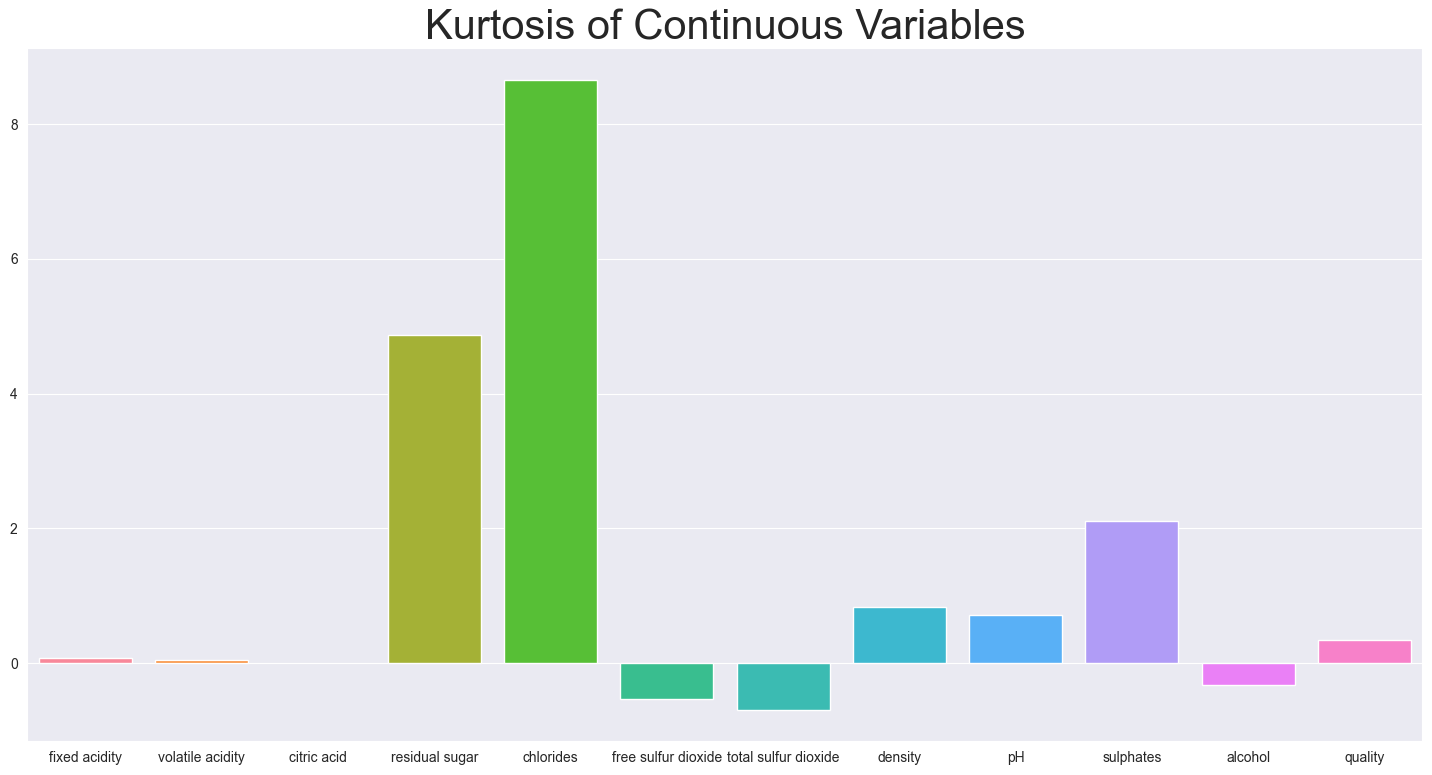

In [23]:
plt.figure(figsize=(18,9))
sns.barplot(x=list(kurt.keys()), y=list(kurt.values()), saturation=2)
plt.title("Kurtosis of Continuous Variables", fontsize=30)
plt.show()

__Sulphates, Residual sugar and Chlorides are the high kurtosis values.__

## __3.7 Correlation between numerical features__

In [24]:
data.corr().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262691,0.555820,0.171851,0.190684,-0.160656,-0.106048,0.678074,-0.709472,0.204554,-0.095249,0.108135
volatile acidity,-0.262691,1.000000,-0.506123,0.033051,0.127940,0.017877,0.091656,0.046820,0.231572,-0.289924,-0.223645,-0.393354
citric acid,0.555820,-0.506123,1.000000,0.135391,0.164296,-0.057505,0.019243,0.308449,-0.469366,0.278542,0.060115,0.175124
residual sugar,0.171851,0.033051,0.135391,1.000000,0.097136,0.085778,0.146259,0.393199,-0.092137,0.006284,0.092598,0.021653
chlorides,0.190684,0.127940,0.164296,0.097136,1.000000,-0.010036,0.079295,0.341990,-0.295596,0.256882,-0.311274,-0.181196
free sulfur dioxide,-0.160656,0.017877,-0.057505,0.085778,-0.010036,1.000000,0.787001,-0.030743,0.080068,0.054849,-0.094360,-0.046420
total sulfur dioxide,-0.106048,0.091656,0.019243,0.146259,0.079295,0.787001,1.000000,0.109994,-0.030788,0.046519,-0.248323,-0.163977
density,0.678074,0.046820,0.308449,0.393199,0.341990,-0.030743,0.109994,1.000000,-0.354422,0.160029,-0.500155,-0.184493
pH,-0.709472,0.231572,-0.469366,-0.092137,-0.295596,0.080068,-0.030788,-0.354422,1.000000,-0.180806,0.209776,-0.055091
sulphates,0.204554,-0.289924,0.278542,0.006284,0.256882,0.054849,0.046519,0.160029,-0.180806,1.000000,0.136209,0.308728


In [25]:
data.corr()['quality']

fixed acidity           0.108135
volatile acidity       -0.393354
citric acid             0.175124
residual sugar          0.021653
chlorides              -0.181196
free sulfur dioxide    -0.046420
total sulfur dioxide   -0.163977
density                -0.184493
pH                     -0.055091
sulphates               0.308728
alcohol                 0.481473
quality                 1.000000
Name: quality, dtype: float64

Text(0.5, 1.0, 'Correlation')

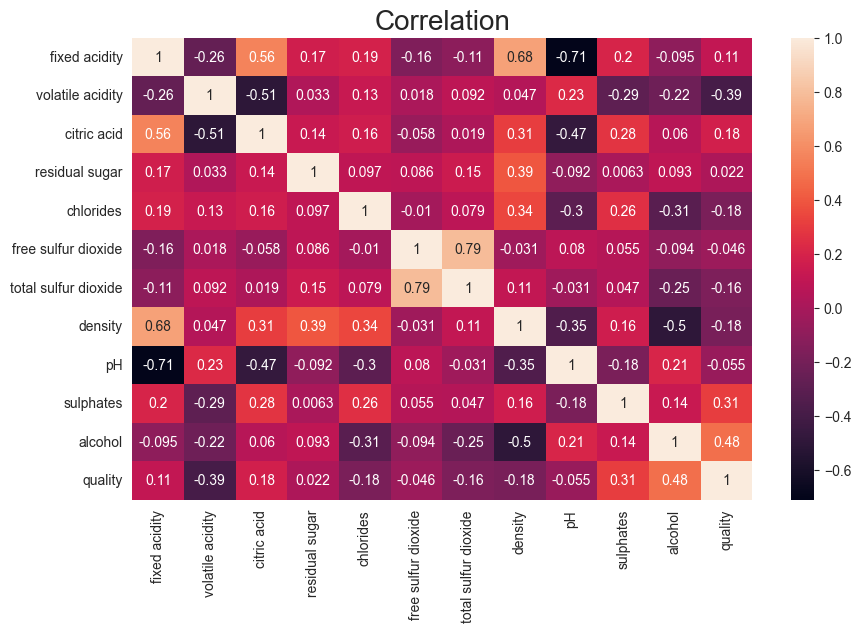

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation", size=20)

__Alcohol, Volatile acidity, Sulphates are the variables that have highly correlated with the target data.__

# __4. Feature Engineering__

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

## __4.1 Drop unwanted Features__

In [29]:
data = data.drop(columns=['residual sugar', 'free sulfur dioxide'])

## __4.2 Handle Missing Values__

__There is no missing data present in this dataset.__

## __4.3 Handle Categorical Features__

## __4.4 Handle Feature Scalling__

## __4.5 Remove Outliers__

# __5. Build Linear Regression Model__

## __5.1 Determine Features & Target Variables__

In [ ]:
X = data.drop(columns='Sales')
y = data.Sales

## __5.2 Split the dataset into Traing and Test sets__

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=True, train_size=0.8)

NameError: name 'X' is not defined

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

## __5.3 Scale data using RobustScaler__

In [ ]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

## __5.4 Train the Model__

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [ ]:
pd.DataFrame(
    data=np.append(model.intercept_, model.coef_),
    index=['Intercept'] + [f"{col} coef." for col in X.columns],
    columns=['Value']
).sort_values('Value', ascending=False)

## __5.5 Model Evaluation__

trainacc = model.score(xtrain, ytrain)
testacc = model.score(xtest, ytest)

pd.DataFrame([trainacc*100, testacc*100], index=['Train Accuracy', 'Test Accuracy'], columns=['Value'])

In [ ]:
from sklearn import metrics
def model_evaluation(model, xtest, ytest, model_name):
    ypred = model.predict(xtest)

    MAE = metrics.mean_absolute_error(ytest, ypred)
    MSE = metrics.mean_squared_error(ytest, ypred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(ytest, ypred)

    return pd.DataFrame(
        [MAE, MSE, RMSE, R2_Score],
        index=['MAE', 'MSE', 'RMSE', 'R2-Score'],
        columns=[model_name],
    )

model_evaluation(model, xtest, ytest, 'Linear Regression')

In [ ]:
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.head()

In [ ]:
def compare_plot(data):
    data.plot(y=['Actual', 'Predicted'], kind='bar', figsize=(10,6), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

In [ ]:
sns.regplot(x=ytest, y=ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
compare_plot(df_compare)

__The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data.__
